In [ ]:
!git clone https://github.com/Sigma1084/AI2101_PortfolioOptimization.git
%cd AI2101_PortfolioOptimization/

/content/AI2101_PortfolioOptimization


## Imports

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import math

# Diversification of a Portfolio


## Markowitz model 

### Assumptions
* Investors are rational (they seek to maximize returns while minimizing risk).
* Investors will accept increased risk only if compensated with higher expected returns.
* Investors receive all pertinent information regarding their investment decision in a timely manner.


### We will be using Markowitz Model to prove that sharpe ratio can be improved by diversification of assets 

### $\text {Risk Function(StdDev) using Markowitz Method}$

In [ ]:
## @param {np.matrix(n, m)} y: yield matrix
##      y[i][j] is the return of asset i at time j

## @param {cp.parameter(n)} W: Weights

# risk_function will take W and y as parameters

# Markovi's Model is used

# Risk using Standard Deviation
def markovi_risk(W, y):
    # Covariance Matrix
    # cov_mat[i][j] is the covariance of i-th and j-th assets
    cov_mat = np.cov(y)

    # Expected Portfolio Risk
    return cp.quad_form(W, cov_mat)



def calcMaxReturn(y, max_risk, risk_function=markovi_risk):
    # n is the number of assets
    # m is the number of time periods
    n, m = y.shape

    # Expected Value of returns 
    # E[i] is the expected return of i-th asset
    E = np.sum(y, axis=1) / m 

    # Weights
    W = cp.Variable(n)

    # Expected Portfolio Return
    Ep = cp.sum(W*E)

    # Here, = cp.quad_form(W, np.cov(y))
    Sp = risk_function(W, y)
    
    objective = cp.Maximize(Ep)
    constraints = [
                W >= 0,  # Weights can't be negative
                cp.sum(W) == 1,  # Since we're calculating ratios

                # The Standard Deviation (risk function) <= maxRisk
                # implies portflio_variance <= max_risk**2
                Sp <= max_risk,
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return prob.value, W.value



def calcMinRisk(y, min_return, risk_function=markovi_risk):

    # n is the number of assets
    # m is the number of time periods
    n, m = y.shape

    # Expected Value of returns 
    # E[i] is the expected return of i-th asset
    E = np.sum(y, axis=1) / m 

    # Weights
    W = cp.Variable(n)

    # Expected Portfolio Return
    Ep = cp.sum(W*E)

    # Here, = cp.quad_form(W, np.cov(y))
    Sp = risk_function(W, y)

    # Calculated using Convex Optimization
    objective = cp.Minimize(Sp)
    constraints = [
                W >= 0,  # Weights can't be negative
                cp.sum(W) == 1,  # Since we're calculating ratios

                # Portfolio return >= the required return
                Ep >= min_return
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return prob.value, W.value


## Data

In [ ]:
# y = np.matrix([
#                [0.026900, 0.020500, 0.004360, 0.055634],           
#                [-0.184593, 0.047840, 0.017366, 0.050033], 
#                [0.228164, -0.013991, 0.001422, -0.047014], 
#                [0.004354, -0.000747, 0.034091, -0.040000],
#                [0.013006, 0.006726, 0.002747, 0.075694]
# ])

# Here, y is a 10 * 15 matrix, meaning it has 10 types of assets with 
#   15 time periods of return
y = np.matrix([
               [-0.021585, 0.010004, -0.024897, 0.007577, 0.006496, -0.021519,
                0.002126, 0.014438, -0.012136, -0.007425, 0.005319, 0.0457, 
                0.013363, -0.004463, 0.000538],
               
               [-0.024719, 0.012364, -0.033661, 0.034123, 0.008631, -0.023249,
                -0.001396, 0.016227, -0.015127, -0.013731, 0.005427, 0.032856,
                0.036658, 0.016074, 0.027684],
               
               [-0.015449, 0.007548, -0.028269, 0.020622, -0.004354, -0.040102,
                -0.022387, 0.00219, -0.023844, 0.023286, 0.038749, 0.024435,
                0.020151, 0.005974, 0.012787],
               
               [-0.013494, 0.007337, -0.003234, 0.029943, 0.011168, -0.022405,
                -0.011417, 0.004495, -0.008105, -0.002293, 0.031489, 0.053628,
                0.002305, 0.005182, -0.000868],
               
               [-0.004435, -0.014925, -0.008811, 0.005597, 0.00767, -0.011882, 
                -0.01893, 0.002346, -0.035778, -0.001338, 0.000347, 0.021571, 
                -0.004223, -0.015209, -0.005148],
               
               [-0.021266, 0.000965, -0.025929, 0.028457, 0.006093, -0.009699,
                -0.011771, 0.00656, -0.015346, -0.001737, 0.017823, 0.0365,
                0.002808, 0.004356, 0.015844],
               
               [0.004481, 0.02221, -0.058953, 0.05783, -0.00504, 0.025967,
                -0.010039, 0.003486, -0.024498, -0.025814, 0.012889, 0.026141,
                0.03754, -0.011177, -0.004321],
               
               [-0.009487, 0.006385, 0.010526, -0.009346, -0.000432, -0.006773,
                -0.005803, 0.001532, -0.010637, -0.007511, -0.008755, -0.0125,
                -0.000984, -0.007709, 0.017231],
               
               [0.034152, 0.007317, 0.02839, 0.079447, 0.078403, -0.078214,
                0.047153, 0.005851, -0.011013, -0.022296, 0.02226, 0.006986,
                -0.00642, 0.001953, 0.040348],
               
               [-0.009444, 0.005441, 0.046956, 0.032839, 0.001104, 0.014924,
                0.015719, 0.000927, 0.005842, -0.017922, -0.004328, -0.014996, 
                -0.008384, -0.007714, -0.012482]
])

k = 21  # The number of sample data we're testing for 

## Calculating Maximum Return given Max Risk for different assets

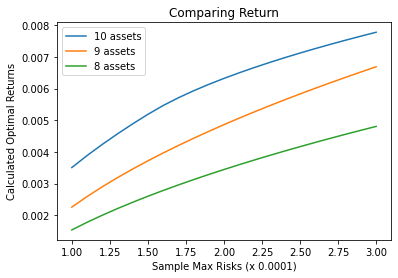

In [ ]:
sample_max_risks = np.linspace(1, 3, k)
scale = 1e-4

num_arr = [10, 9, 8]
optimal_returns = dict()

for i in num_arr:
  opt_returns = []
  for max_risk in sample_max_risks:
      opt_returns.append(calcMaxReturn(y[:i], max_risk*scale)[0])
  optimal_returns[i] = opt_returns

for i in num_arr:
  plt.plot(sample_max_risks, optimal_returns[i], label=f"{i} assets")

plt.title("Comparing Return")
plt.xlabel(f"Sample Max Risks (x {scale})")
plt.ylabel("Calculated Optimal Returns")
plt.legend()
plt.show()

### It is evident from the graph that investing in more number of assets (diversifying the portfolio) gives us a better Sharpe Ratio

## Calculating Minimum Risk given Minimum Return

,Minimum Return,Calculated Optimal Risk
0,0.0020,0.000067
5,0.0055,0.000161
10,0.0090,0.000415
15,0.0125,0.000902
20,0.0160,inf


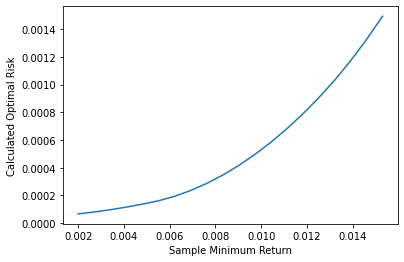

In [ ]:
sample_min_returns = np.linspace(0.002, 0.016, k)
optimal_risks = []

for min_return in sample_min_returns:
    optimal_risks.append(calcMinRisk(y, min_return)[0])

# We display every 5th entry and plot all the entries
display(pd.DataFrame({"Minimum Return": sample_min_returns, 
                      "Calculated Optimal Risk": optimal_risks})
        .iloc[::5, :])

plt.plot(sample_min_returns, optimal_risks)
plt.xlabel("Sample Minimum Return")
plt.ylabel("Calculated Optimal Risk")
plt.show()

# Comparing VaR and CVaR risk measures

## Data

In [ ]:
y = [None for i in range(10)]
file_names = ["AMZN", "APPL", "FB", "GOOG", "JPM", 
              "MSFT", "NVDA", "PG", "TSLA", "V"]

for i, file_name in enumerate(file_names):
  url = "content/" + file_name + ".csv"
  y[i] = pd.read_csv(url).daily_return[1:]

y = np.matrix(y)
n, m = y.shape

meanReturns = []
for i in range(n):
  meanReturns.append(np.sum(y[i])/m)

covMatrix = np.cov(y)

MONTE_CARLO_SIMULATIONS = 1000

## $\text {Risk Function(VaR and CVaR) using Monte Carlo Method}$

In [ ]:
# Function to select VaR from monte corle simulations
def mcVaR(returns, beta=5):
  if isinstance(returns, pd.Series):
    return np.percentile(returns, beta)
  else:
    raise TypeError("returns must be a pandas.Series")


# Function to select CVaR from monte corle simulations
def mcCVaR(returns, beta=5):
  if isinstance(returns, pd.Series):
    belowVaR = returns <= mcVaR(returns, beta)
    return returns[belowVaR].mean()
  else:
    raise TypeError("returns must be a pandas.Series")

## @param {int} n: Number of Assets
def mcPortfolioReturns(weights, initial_portfolio=100000):
  mc_sims = MONTE_CARLO_SIMULATIONS  # Number of simulations
  n = len(weights)
  T = 11  # Timeframe in weeks

  meanM = np.full(shape=(T, n), fill_value=meanReturns).T
  portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

  for m in range(mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, n))
    L = np.linalg.cholesky(covMatrix)  # L@L' = covMatrix
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(
                  np.inner(weights, dailyReturns.T)+1) * initial_portfolio
  return portfolio_sims

## Monte Carlo Simulations

In [ ]:
k = 800  # The number of random weights we experiment on
n = 10  # The number of assets

weights = [None for i in range(k)]
for i in range(k):
  weights[i] = np.random.random(n)
  weights[i] /= np.linalg.norm(weights[i])

sims = []
for i in range(k):
    sims.append(mcPortfolioReturns(weights[i]))

## Plot of the Monte Carlo simulations

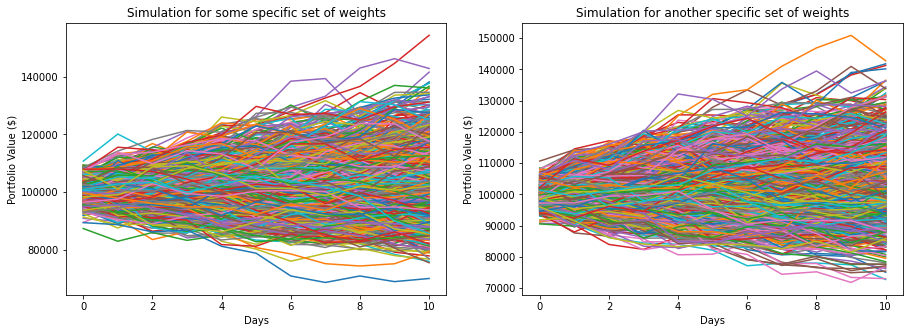

In [ ]:
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(sims[1])
ax1.set_title("Simulation for some specific set of weights")
ax1.set_xlabel("Days")
ax1.set_ylabel("Portfolio Value ($)")

ax2.plot(sims[2])
ax2.set_title("Simulation for another specific set of weights")
ax2.set_xlabel("Days")
ax2.set_ylabel("Portfolio Value ($)")

plt.show()

## Results 

In [ ]:
portResults = [pd.Series(sims[i][-1,:]) for i in range(k)]
initialPortfolio = 100000
VaR = []
CVaR = []
for i in range(k):
    VaR.append(initialPortfolio - mcVaR(portResults[i]))
    CVaR.append(initialPortfolio - mcCVaR(portResults[i]))

## Comparing $\text{VaR and CVaR}$ risk measures

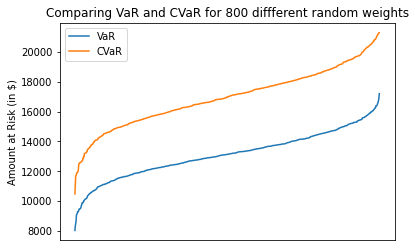

In [ ]:
# plt.plot(sample_min_returns,opt_risks, label="StdDev")

VaR.sort()
CVaR.sort()
x_vals = list(range(len(VaR)))

plt.plot(x_vals, VaR, label="VaR")
plt.plot(x_vals, CVaR, label="CVaR")
plt.title(f"Comparing VaR and CVaR for {k} diffferent random weights")
plt.xlabel("Different Weights")
plt.ylabel("Amount at Risk (in $)")

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)

plt.legend()
plt.show()

### It can be seen that for any random weights, $\text{CVaR} \geq \text{VaR}$